# Ensemble methods

This notebook implements various ensemble methods using the Python scikit-learn library to enhance prediction models.

### Step 1: Exploratory data analysis (EDA)

Before we dive into ensemble methods, it's crucial to start with a robust feature selection process. This will help ensure that our models are only trained on variables that have a significant impact on our predictive variable, `BiodiversityHealthIndex`.

We conduct a thorough EDA to understand the relationships between `BiodiversityHealthIndex` and other environmental indicators in the dataset. Look for patterns, anomalies, or any insights that can inform your feature selection process.

Steps:
1. Load and inspect the dataset (URL: `https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv`). 
2. Generate summary statistics for numerical features. 
3. Visualise the distribution of the `BiodiversityHealthIndex`.  
4. Use a pairplot to visualise the relationships between variables.

   Year  WaterQualityIndex  ClimateChangeImpactScore  LandUseChange  \
0  2010                 35                  7.542535       6.630073   
1  2010                 13                  1.617642       6.477132   
2  2010                 10                  0.904817       9.069428   
3  2010                 36                  7.060190       7.061932   
4  2010                 24                  8.439246       4.504786   

   InvasiveSpeciesCount  ConservationFunding  EcoTourismImpact  \
0                    39                   46          1.193810   
1                    45                   18          8.484718   
2                    28                   59          3.412444   
3                    37                   88          9.718453   
4                    41                   88          9.118186   

   ForestCoverChange  SoilQualityIndex  WaterUsage  RenewableEnergyUsage  \
0           0.032204                70          33                    13   
1          -4.803485    

<Figure size 1000x800 with 0 Axes>

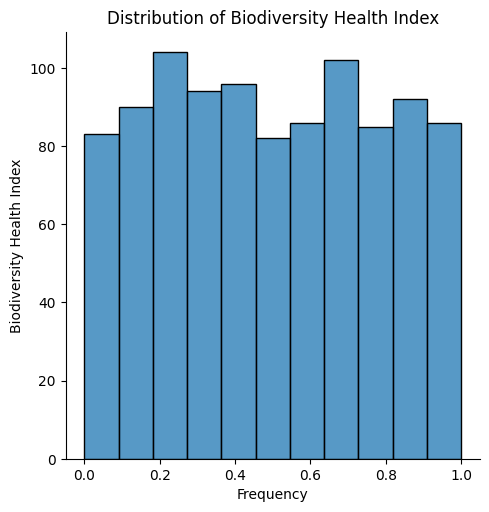

In [11]:
#We import the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We read the data onto a dataframe called 'df'
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/SDG_15_Life_on_Land_Dataset.csv')

#To display the first five rows from the dataframe
print(df.head())

#To display the datatypes of the features
print(df.info())

#To get summary statistics of the features
print(df.describe())

#To get a view of how the distribution is
plt.figure(figsize=(10,8))
sns.displot(df['BiodiversityHealthIndex'])
plt.title('Distribution of Biodiversity Health Index')
plt.xlabel('Frequency')
plt.ylabel('Biodiversity Health Index')
plt.show()

#To display the pairplot to show the relationship between variables
(df.sample(100))  # Adjust sample size as necessary
plt.show()

### Step 2: Correlation analysis

We calculate the correlation coefficients between `BiodiversityHealthIndex` and each of the other environmental indicators. This will help us identify the variables most closely related to our target variable.

Correlation with Biodiversity Health Index: 
 BiodiversityHealthIndex         1.000000
SpeciesReintroductionEfforts    0.047989
LandUseChange                   0.040171
InvasiveSpeciesCount            0.031199
SoilQualityIndex                0.023898
AgriculturalIntensity           0.023563
WaterQualityIndex               0.023446
HabitatConnectivity             0.008568
WaterUsage                      0.007323
PollinatorDiversity             0.002505
RenewableEnergyUsage           -0.010840
ClimateChangeImpactScore       -0.014917
Year                           -0.026502
CarbonEmissionLevels           -0.034371
ConservationFunding            -0.042731
ForestCoverChange              -0.046136
EcoTourismImpact               -0.066228
Name: BiodiversityHealthIndex, dtype: float64


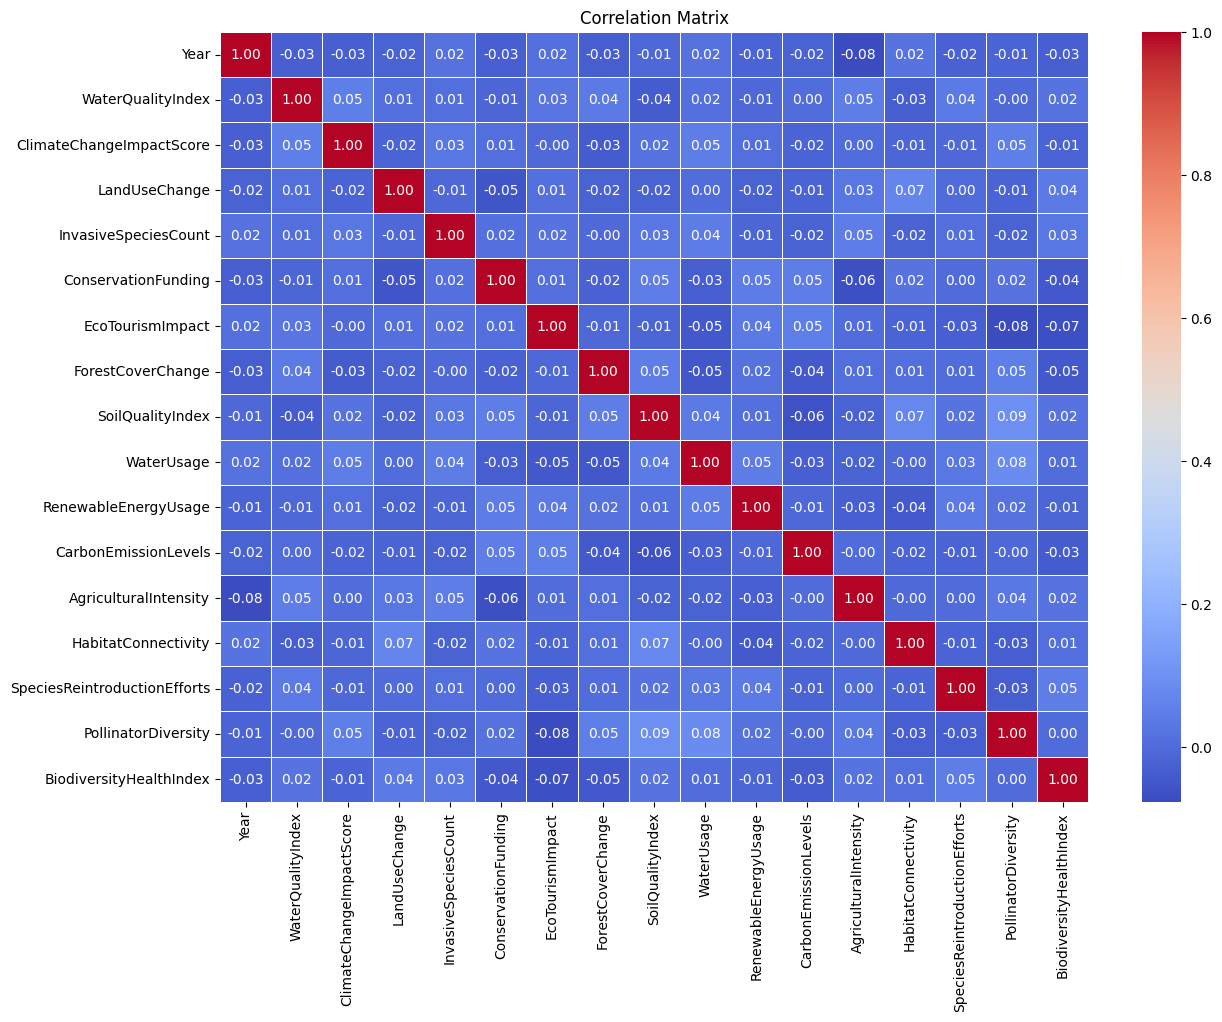

In [20]:
#We create the correlation matrix and store it in a variable
corr_matrix = df.corr()

#We print out the correlation between BiodiversityHealthIndex and other variables in descending order
print('Correlation with Biodiversity Health Index: \n', corr_matrix['BiodiversityHealthIndex'].sort_values(ascending = False))

#We display a heatmap of the correlation matrix
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The **correlation matrix** confirms what the pairplot suggested - there's very little correlation between the independent variables and the biodiversity index. Considering that strong correlation is at a value of 1, and our variables are much, much smaller at values closer to zero, there might be problems fitting a model. We'll forge ahead for now and see what happens!

### Step 3: Selecting top variables and adjusting the dataset

Based on the correlation analysis, we select the top 6 variables (`top_variables`) that show the highest correlation with `BiodiversityHealthIndex`. Adjust our dataset to include only the selected 6 variables and `BiodiversityHealthIndex`. This refined dataset will be used for training and testing our ensemble models.

In [29]:
#We select the top variables
top_vars = ['SpeciesReintroductionEfforts', 'LandUseChange', 'EcoTourismImpact', 'ForestCoverChange',
                'CarbonEmissionLevels', 'ConservationFunding']

#We adjust the dataset
X = df[top_vars]
y = df['BiodiversityHealthIndex']

#We visually inspect the X dataframe
X.head()

,SpeciesReintroductionEfforts,LandUseChange,EcoTourismImpact,ForestCoverChange,CarbonEmissionLevels,ConservationFunding
0,9.311312,6.630073,1.193810,0.032204,22,46
1,4.698086,6.477132,8.484718,-4.803485,63,18
2,2.080495,9.069428,3.412444,-2.563852,46,59
3,2.192657,7.061932,9.718453,3.425382,60,88
4,7.405189,4.504786,9.118186,-1.295086,61,88


### Step 4: RandomForestRegressor

We then implement a `RandomForestRegressor` from `sklearn.ensemble` to predict `BiodiversityHealthIndex` based on other environmental indicators. Split the data into training and test sets, fit the `RandomForestRegressor` model on the training data, and calculate the R-squared value on the test set.

In [39]:
# We import the regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# We split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# We then fit the base model
ols_reg = LinearRegression

# We instantiate the bagging model with the base model
bag_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)

# We train the model
bag_reg.fit(X_train, y_train)

# We get and test our model's predictions
y_predictions = bag_reg.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('R squared: ', r2_score(y_test, y_predictions))

RMSE:  0.3098397099687661
R squared:  -0.16218036661647406


Well. This brings us to an uncomfortable reality of building models. We have a negative R-squared value! This is a big red flag, and should never be ignored (and the model should never be used as is). This suggests that there is not enough predictive powers in our model to predict with success. Considering that we know there is very little correlation between the input variables and the actual output variable that we could see earlier, this shouldn't come as a surprise. 

The obvious question now: What do we do? In short, some data are just not made for fitting models - we cannot change the fact that we have no predictors, even though we have a fantastic algorithm to use. Normally, we could play around to see what's happening and maybe find some relationships, but given the lack of patterns, linearity in relationships and general lack of correlation, it's unlikely to be successful.

### Step 5: GradientBoostingRegressor

We introduce `GradientBoostingRegressor` to predict `BiodiversityHealthIndex` using the same dataset. Train the model on the same training data and evaluate its R-squared value on the test set. Compare its performance with the `RandomForestRegressor`.

In [40]:
# We import the regression model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# We split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# We then fit the base model
ols_reg = LinearRegression

# We instantiate the bagging model with the base model
bag_reg = GradientBoostingRegressor(n_estimators = 100, random_state = 42)

# We train the model
bag_reg.fit(X_train, y_train)

# We get and test our model's predictions
y_predictions = bag_reg.predict(X_test)
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('R squared: ', r2_score(y_test, y_predictions))

RMSE:  0.3086919182281535
R squared:  -0.15358579199498323


When fitting the Gradient Boosting model, we are again faced with a **negative R-squared** value. This confirms our experience with the tree model - it's unlikely that this data, in its current form and with the current lack of clear relationships, will be able to predict using either of these models. 

A large part of fitting models to data is knowing when the model is acceptable, and when it's almost worse than just using a moving average to suggest future paths. Today was unfortunately one of those days where we'll need to find a different solution, as neither of these models are fit for predicting outputs. It's important to be truthful about models fitting poorly, and about models not fitting at all (as we had today). Use the metrics produced to guide you, use the assumptions we introduced in earlier lessons to assess whether data might be appropriate for fitting a model, and only then start the process. 